# Visualize state vectors
- the changes of quantum states by different gates are visualized

In [236]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import *

from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE,YGate,XGate,ZGate,UGate
import itertools
init_printing() 

In [288]:
#calc coefficients
def calc_coeff(state,n_qubit):
    coeff_dict={}
    for bit in itertools.product([0,1], repeat=n_qubit):
        bit=list(reversed(bit))
        bra=Dagger(Qubit(*bit))
        val=(qapply((bra*state).doit()))

        bit=list(reversed(bit))
        coeff_dict["".join([str(i) for i in bit])]=np.array(val).astype(np.complex64)

    return coeff_dict



def parse_gate_name(gate):
    str_name=str(gate)

    if str_name.find("Matrix")>0:
        if str_name.find("*I")>0:
            return "$U_{x}$"
        else:
            return "$U_{y}$"

    try:
        opr_name,target=str_name.split("(")
        target=target.replace(")","")
        target=",".join([str(int(i)+1) for i in target.split(",")])

        return "$"+opr_name+"$"+"$_{"+target+"}$"
    except:
        return str_name

def circle_plot(coeff_dict,operator,plot_verbose=False):

    vmax=1.1
    n_plots=len(list(coeff_dict))
    fig = plt.figure(figsize=(n_plots,1),dpi=150)

    i=0
    for k,pos in coeff_dict.items():

        x=pos.real
        y=pos.imag

        radius=(x**2+y**2)**0.5

        ax = fig.add_subplot(1, n_plots, i+1)

        ax.plot((-vmax,vmax),(0,0),c="black",linewidth=0.2)
        ax.plot((0,0),(-vmax,vmax),c="black",linewidth=0.2)

        if i==0:
            ax.text(-vmax,vmax*1.5,parse_gate_name(operator),fontsize=8,color="black")
            if plot_verbose:
                ax.text(-vmax*1.5,0,"$-1$",fontsize=8,color="gray")
                ax.text(vmax*0.9,0,"$+1$",fontsize=8,color="gray")
                ax.text(0,-vmax*1.2,"$-i$",fontsize=8,color="gray")
                ax.text(0,vmax,"$+i$",fontsize=8,color="gray")


        draw_circle = plt.Circle((0, 0), 1,fill=False,alpha=0.5)
        ax.add_artist(draw_circle)
        draw_circle = plt.Circle((0, 0), radius,fill=False,color="orange",alpha=0.9)
        ax.add_artist(draw_circle)

        ax.annotate('', xytext=(0,0), xy=(x,y),
                    arrowprops=dict(arrowstyle='-|>', 
                                    connectionstyle='arc3', 
                                    facecolor='orange', 
                                    edgecolor='orange',
                                    alpha=0.3)
                )


        ax.scatter(x,y,  color="red",s=2)
        ax.scatter(*(0,0),  color="gray",s=2)
        ax.set_aspect(1)
        ax.set_xlim(-vmax,vmax)
        ax.set_ylim(-vmax,vmax)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

        if plot_verbose:
            ax.text(-vmax,vmax,f"|{k}"+r"$\rangle$",fontsize=8,color="gray")



        i+=1
    plt.show()

def plot_state_operations(n_qubit,operator_list,plot_initial=False):
    state=Qubit("0"*n_qubit)
    if plot_initial:
        coeff_dict=calc_coeff(state,n_qubit)
        circle_plot(coeff_dict,"Initial",plot_verbose=True)
    for operator in operator_list:
        state=qapply(operator*state)
        coeff_dict=calc_coeff(state,n_qubit)
        circle_plot(coeff_dict,operator)
    return state

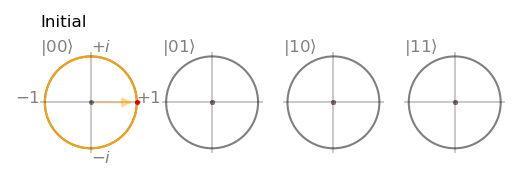

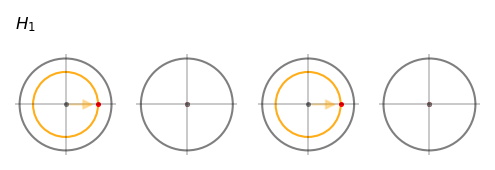

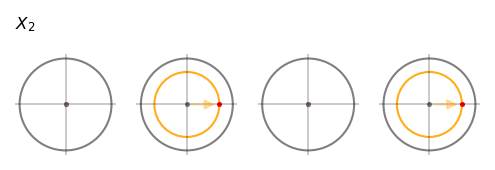

In [289]:
# two qubits, apply H and X

operator_list=[H(0),X(1)]
plot_state_operations(2,operator_list,plot_initial=True)

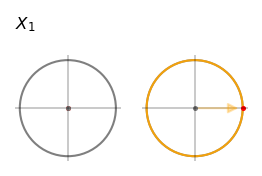

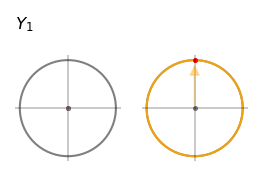

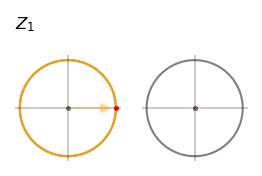

In [290]:
# X,Y,Z gates
plot_state_operations(1,[X(0)])
plot_state_operations(1,[Y(0)])
plot_state_operations(1,[Z(0)])

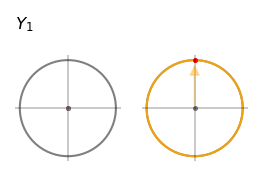

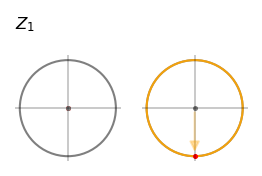

In [291]:
# apply Y and Z
plot_state_operations(1,[Y(0),Z(0)])

In [292]:
def Ry(i,x1):
    mat = Matrix([[cos(x1/2), -sin(x1/2)], [sin(x1/2), cos(x1/2)]])
    return UGate((i,), mat)
def Rx(i,x1):
    mat = Matrix([[cos(x1/2), -I*sin(x1/2)], [-I*sin(x1/2), cos(x1/2)]])
    return UGate((i,), mat)

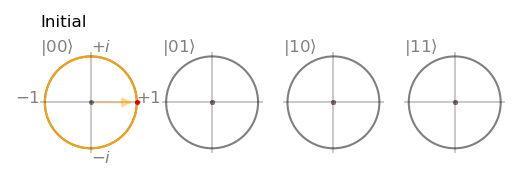

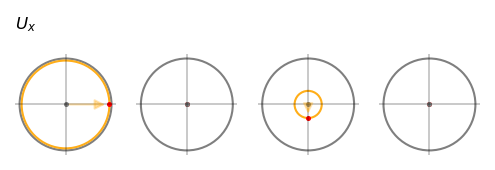

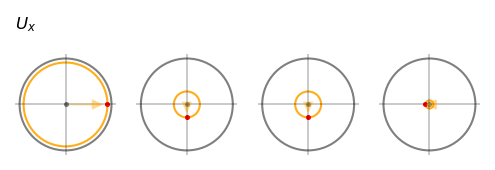

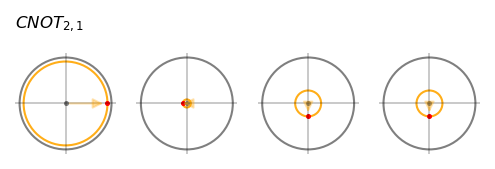

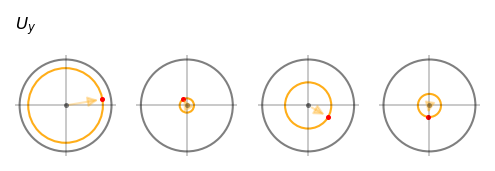

In [296]:
# apply Rx_1(0.6), Rx_2(0.6), CNOT, and Ry_1(0)
c=1
plot_state_operations(2,[Rx(0,0.6),Rx(1,0.6),CNOT(1,0),Ry(0,c)],plot_initial=True)